# hw05

## Metadata

```{yaml}
Name:    hw05
URL:     https://github.com/tslever/DS5100-2022-08-tsl2b/blob/main/lessons/M05/hw05.ipynb
Course:  DS 5100
Term:    Fall 2022 Online
Module:  M05: numpy
Topic:   Capital Asset Pricing Model (CAPM)
Author:  Tom Lever
Net ID:  tsl2b
Created: 20 September 2022
Updated: 21 September 2022
```

## Overview

In finance, a capital asset pricing model (CAPM) is a single-factor regression model used to explain and predict excess returns for a stock $i$.

There are better, more accurate models, but a CAPM has its uses.

For example, the market beta $\beta_i$ is a parameter of a CAPM.

Here is the formula for calculating the expected excess return for stock $i$.

$$E\left[R_i\right] - R_f = \beta_i \left(E\left[R_m\right] - R_f\right)$$

where

* $E\left[R_i\right]$ is the expected excess return of stock $i$
* $R_f$ is the risk-free treasury rate
* $\beta_i$ is the market beta of stock $i$
* $E\left[R_m\right] - R_f$ is the market-risk premium


## Setting Up

Import [numpy](https://numpy.org/doc/stable/).

In [1]:
import numpy as np

Define Risk-free treasury rate.

In [1]:
R_f: float = 0.0175 / 252.0

## Preparing the Data

We import CAPM market data and convert the data into usable numpy arrays.

### Read in the Market Data

The values are closing prices, adjusted for splits and dividends.

The prefixes of the second two columns are based on the following codes:

* SPY is an Exchange-Traded Fund (ETF) for the S&P 500, a stock market index tracking the stock performance of 500 large companies listed on exchanges in the United States.
* AAPL stands for Apple.

In [3]:
import os
path: str = None
if os.name == 'posix':
    path = "~/Documents/DS5100-2022-08-O/lessons/M05_NumPy/HW/capm_market_data.csv"
elif os.name == 'nt':
    path = os.environ['USERPROFILE'] + "/Documents/DS5100-2022-08-O/lessons/M05_NumPy/HW/capm_market_data.csv"
list_of_file_lines: list[str] = None
with open(path, 'r') as file:
    list_of_file_lines = file.readlines()
print(type(list_of_file_lines))

<class 'list'>


### Create numpy Array of Column Names

In [4]:
!pip install nptyping

In [5]:
from nptyping import Float64, NDArray, Shape, String
list_of_column_names: list[str] = list_of_file_lines[0].strip().split(',')
numpy_array_of_column_names: NDArray[Shape['3'], String] = np.array(list_of_column_names)
print(numpy_array_of_column_names)

['date' 'spy_adj_close' 'aapl_adj_close']


### Create numpy Arrays of Dates and Returns

In [6]:
list_of_data_lines: list[str] = [line.strip().split(',') for line in list_of_file_lines[1:]]
print(len(list_of_data_lines))
numpy_array_of_data: NDArray[Shape['135, 3'], String] = np.array(list_of_data_lines)
numpy_array_of_dates: NDArray[Shape['135'], String] = numpy_array_of_data[:, 0]
numpy_array_of_returns: NDArray[Shape['135, 2'], Float64] = numpy_array_of_data[:, 1:3].astype('float')
print(numpy_array_of_dates[0:3])
print(numpy_array_of_returns[0:3, :])

135
['2020-01-02' '2020-01-03' '2020-01-06']
[[321.55578613 298.82995605]
 [319.12091064 295.92471313]
 [320.33837891 298.28271484]]


## Tasks

### Task 1

(1 point)

Print the first 5 rows of the numpy array of returns.

In [7]:
print(numpy_array_of_returns[0:5, :])

[[321.55578613 298.82995605]
 [319.12091064 295.92471313]
 [320.33837891 298.28271484]
 [319.43765259 296.87988281]
 [321.1401062  301.6555481 ]]


### Task 2

(1 point)

Print the first five values from the SPY column in the numpy array of returns.

Then do the same for the AAPL column.

Use one cell for each operation.

In [8]:
numpy_array_of_stock_names: NDArray[Shape['2'], String] = numpy_array_of_column_names[np.where(numpy_array_of_column_names != 'date')]
index_of_SPY_column: int = numpy_array_of_stock_names.tolist().index('spy_adj_close')
SPY_returns: NDArray[Shape['135'], Float64] = numpy_array_of_returns[:, index_of_SPY_column]
_ = [print(return_) for return_ in SPY_returns[0:5].tolist()]

321.555786132812
319.120910644531
320.33837890625
319.437652587891
321.140106201172


In [9]:
index_of_AAPL_column: int = numpy_array_of_stock_names.tolist().index('aapl_adj_close')
AAPL_returns: NDArray[Shape['135'], Float64] = numpy_array_of_returns[:, index_of_AAPL_column]
_ = [print(return_) for return_ in AAPL_returns[0:5].tolist()]

298.829956054687
295.924713134766
298.28271484375
296.8798828125
301.655548095703


### Task 3

(1 point)

Compute the excess returns by subtracting the constant $R_f$ from the numpy array of returns.

Save the results as a two-dimensional numpy array named EXCESS.

Print the last five rows from EXCESS.

In [10]:
EXCESS = numpy_array_of_returns - R_f
print(EXCESS[-5:, :])

[[314.37993544 383.00994032]
 [317.58992689 383.67992323]
 [314.83992689 381.90993422]
 [318.91994398 388.22994154]
 [321.84993666 390.89992445]]


### Task 4 

(1 point)

Make a simple [scatterplot using Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) with SPY excess returns on the x-axis, and AAPL excess returns on the y-axis.

Hint: Use the following code:

```python
from matplotlib.pyplot import scatter

scatter(<x>, <y>)
```
Replace `<x>` and `<y>` with the appropriate vectors.

You may want to save the vectors for the SPY and AAPL columns as `x` and `y` respectively. This will make it visually easier to perform Task 6.

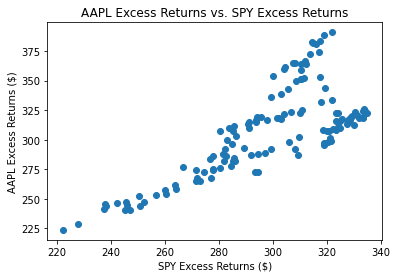

In [11]:
SPY_excess_returns: NDArray[Shape['135'], Float64] = EXCESS[:, index_of_SPY_column]
AAPL_excess_returns: NDArray[Shape['135'], Float64] = EXCESS[:, index_of_AAPL_column]
from matplotlib import pyplot as plt
plt.scatter(SPY_excess_returns, AAPL_excess_returns)
plt.title("AAPL Excess Returns vs. SPY Excess Returns")
plt.xlabel("SPY Excess Returns ($)")
plt.ylabel("AAPL Excess Returns ($)")
plt.show()

### Taks 5 

(3 points)

Use the **normal equation**, listed below, to compute the Regression Coefficient Estimate of the data plotted above, $\hat\beta_i$.

Note that $x^T$ denotes the transpose of $x$.

$\begin{aligned} \hat\beta_i=(x^Tx)^{−1}x^Ty \end{aligned}$ 

Use the Numpy functions for matrix to do this &mdash; multiplication, transpose, and inverse. 

Note, however, that since $x$ in this case a single column matrix, i.e. a vector, the result of $x'x$ will be a scalar, which is not invertible. So you can just invert the result by division, i.e. 

$\hat\beta_i = \large\frac{1}{x^Tx} \small(x^Ty)$

Be sure to review what these operations do, and how they work, if you're a bit rusty.

In [12]:
def calculate_regression_coefficient_estimate(x: NDArray[Shape['135'], Float64], y: NDArray[Shape['135'], Float64]) -> float:
    regression_coefficient_estimate = 1 / np.matmul(np.transpose(x), x) * np.matmul(np.transpose(x), y)
    return regression_coefficient_estimate

calculate_regression_coefficient_estimate(SPY_excess_returns, AAPL_excess_returns)

1.029980294240815

### Task 6

(3 points)

**Measuring Beta Sensitivity to Dropping Observations (Jackknifing)**

Let's understand how sensitive the market beta is to each data point.   
We want to drop each data point (one at a time), compute $\hat\beta_i$ using our formula from above, and save each measurement.

Write a function called `beta_sensitivity()` with these specs:

- Take numpy arrays x and y as inputs.
- For each observation i, compute the beta without the current observation. You can use a `lambda` function for this.
- Return a list of tuples each containing the observation row dropped and the beta estimate, i.e. something like `(i, beta_est)`, depending how you've named your variables.

Hint: `np.delete(x, i)` will delete observation i from array x.

Call `beta_sensitivity()` and print the first five tuples of output.

In [13]:
def beta_sensitivity(x: NDArray[Shape['135'], Float64], y: NDArray[Shape['135'], Float64]) -> list[tuple[int, float]]:
    indices_of_removed_observation_and_redacted_market_beta_estimates: list[tuple[int, float]] = []
    for index_of_removed_observation in range(0, len(x)):
        redacted_x: NDArray[Shape['134'], Float64] = np.delete(x, index_of_removed_observation)
        redacted_y: NDArray[Shape['134'], Float64] = np.delete(y, index_of_removed_observation)
        redacted_market_beta_estimate: float = calculate_regression_coefficient_estimate(redacted_x, redacted_y)
        index_of_removed_observation_and_redacted_market_beta_estimate: tuple[int, float] = (index_of_removed_observation, redacted_market_beta_estimate)
        indices_of_removed_observation_and_redacted_market_beta_estimates.append(index_of_removed_observation_and_redacted_market_beta_estimate)
    return indices_of_removed_observation_and_redacted_market_beta_estimates

In [14]:
indices_of_removed_observations_and_market_beta_estimates: 'np.ndarray[tuple[int], np.dtype[float]]' = beta_sensitivity(SPY_excess_returns, AAPL_excess_returns)
print(indices_of_removed_observations_and_market_beta_estimates[0:5])

[(0, 1.030847730172396), (1, 1.0308516176393125), (2, 1.0308255236222597), (3, 1.0308357542837525), (4, 1.030759501843587)]
